# Data Cleaning

In [1]:
# Importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Display all columns
pd.set_option("display.max_columns", None)

%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('used_cars.csv')

In [3]:
# Making copy of data so that any unexpected changes does not takes place in original dataframe
data = df.copy()

In [4]:
# First five rows
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


Price and Mileage column data type is in object, we have to convert these columns into integer by removing "$" and "," in price and "mi." and "," in milage columns and change data type to integer. 

In [6]:
# Replacing characters from milage(mi) and price($) columns and converting to integer by creating two new columns and dropping price and milage.

data['price_usd'] = data['price'].replace({'\$':'', ',':''}, regex=True).astype(int)
data['mileage'] = data['milage'].replace({r'mi.':'', ',':''}, regex=True).astype(int)

data.drop(columns=["milage", "price"], inplace=True)
data.head(10)

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_usd,mileage
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,51000
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,34742
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,22372
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,88900
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,9835
5,Acura,ILX 2.4L,2016,Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,14798,136397
6,Audi,S3 2.0T Premium Plus,2017,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000,84000
7,BMW,740 iL,2001,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300,242000
8,Lexus,RC 350 F Sport,2021,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927,23436
9,Tesla,Model X Long Range Plus,2020,NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,69950,34000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   fuel_type     3839 non-null   object
 4   engine        4009 non-null   object
 5   transmission  4009 non-null   object
 6   ext_col       4009 non-null   object
 7   int_col       4009 non-null   object
 8   accident      3896 non-null   object
 9   clean_title   3413 non-null   object
 10  price_usd     4009 non-null   int64 
 11  mileage       4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB


In [8]:
# Unique car brands and number of cars in each brand.

print(f"Number of unique brands : {data['brand'].value_counts().shape[0]}")
print(":"*100)
print(data['brand'].value_counts())

Number of unique brands : 57
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Subaru            64
Acura             64
Mazda             64
Honda             63
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Genesis           20
Mitsubishi        20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Ast

In [9]:
# Replacing Land with Land Rover from brand column
data["brand"] = data["brand"].replace("Land", "Land Rover")
data["brand"] = data["brand"].replace("Aston", "Aston Martin")

In [10]:
data[data["brand"] == "Land Rover"]["model"].sample(10)

3689                    Rover Range Rover Westminster SWB
3242                          Rover Range Rover Sport HSE
893        Rover Range Rover SV Autobiography Dynamic SWB
2041                                     Rover Defender S
2524                            Rover Range Rover P530 SE
1427    Rover Range Rover Sport 5.0L Supercharged Dynamic
2925                                  Rover Discovery LSE
2755                       Rover Range Rover Velar P380 S
381                         Rover Range Rover Evoque Pure
148                         Rover Range Rover Evoque Pure
Name: model, dtype: object

In [11]:
data[data["brand"] == "Aston Martin"]["model"].sample(5)

2140           Martin Vantage Base
11         Martin DBS Superleggera
3996    Martin DB7 Vantage Volante
3328        Martin Vantage GT Base
535         Martin V8 Vantage Base
Name: model, dtype: object

In [12]:
# Removing first word Rover and Martin from model column matching Land Rover and Aston Martin brand column
data.loc[data["brand"] == "Land Rover", "model"] = data.loc[data["brand"] == "Land Rover", "model"].str.split(n=1).str[1]
data.loc[data["brand"] == "Aston Martin", "model"] = data.loc[data["brand"] == "Aston Martin", "model"].str.split(n=1).str[1]

In [13]:
print(f"Total number of car models : {df['model'].unique().shape[0]}")

Total number of car models : 1898


There are many categories of brands and models. <br> We can handle this by clubbing rare car brands and name it "other" and for models we can use ordered target encoding.

In [14]:
# All Categorical variables
categorical_features = data.select_dtypes(include=["object", "category"]).columns.to_list()

print(f"Categorical Variables: {categorical_features}")

print(":"*100)

# Number of categories in categorical features
for feature in categorical_features:
    print(f"Numnber of categories in {feature}: {data[feature].unique().shape[0]}")

Categorical Variables: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Numnber of categories in brand: 57
Numnber of categories in model: 1898
Numnber of categories in fuel_type: 8
Numnber of categories in engine: 1146
Numnber of categories in transmission: 62
Numnber of categories in ext_col: 319
Numnber of categories in int_col: 156
Numnber of categories in accident: 3
Numnber of categories in clean_title: 2


There are too many categories in model, engine, transmission, ext_col and int_col.

In [15]:
# All numerical variables
numerical_features = data.select_dtypes(include=["number"]).columns.to_list()

print(f"Numerical Variables: {numerical_features}")

Numerical Variables: ['model_year', 'price_usd', 'mileage']


In [16]:
# NaN variables
nan_features = [feature for feature in data.columns if data[feature].isnull().sum()>=1]
print(f"NaN Variables: {nan_features}")

print("-"*100)

# Unique categories in NaN columns with less than 25 categories
for feature in nan_features:
    if len(data[feature].unique())>=25:
        pass
    else:
        print(f"Unique categories in {feature}: {data[feature].unique()}")
        print(f"Percentage of NaN: {(data[feature].isna().sum()/data.shape[0]*100)}%")
        print(f"Number of categories : {data[feature].unique().shape[0]}")
        print("-"*100)

NaN Variables: ['fuel_type', 'accident', 'clean_title']
----------------------------------------------------------------------------------------------------
Unique categories in fuel_type: ['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Percentage of NaN: 4.240458967323522%
Number of categories : 8
----------------------------------------------------------------------------------------------------
Unique categories in accident: ['At least 1 accident or damage reported' 'None reported' nan]
Percentage of NaN: 2.8186580194562234%
Number of categories : 3
----------------------------------------------------------------------------------------------------
Unique categories in clean_title: ['Yes' nan]
Percentage of NaN: 14.866550261910701%
Number of categories : 2
----------------------------------------------------------------------------------------------------


Value Counts of : fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64


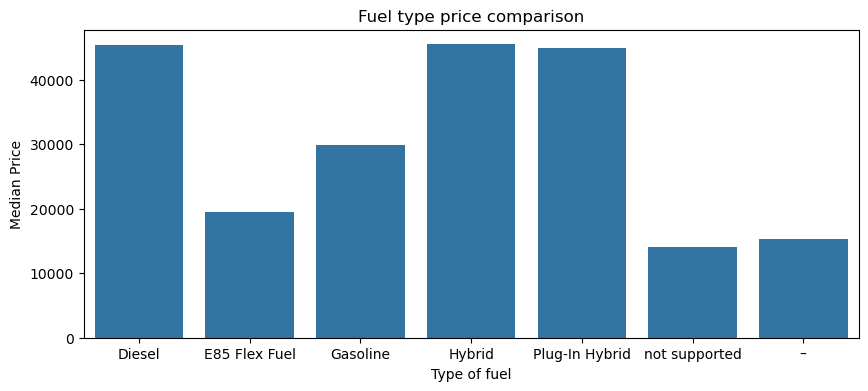

In [17]:
print(f"Value Counts of : {data["fuel_type"].value_counts()}")
plt.figure(figsize=(10,4))
sns.barplot(data.groupby("fuel_type")["price_usd"].median())
plt.xlabel("Type of fuel")
plt.title("Fuel type price comparison")
plt.ylabel("Median Price")
plt.show()

Since median price of fuel type Plug-In Hybrid is close to Hybrid we can rename it to Hybrid. We have to find out "not supported", "–" and NaN fuel_type. 

In [18]:
# Replacing fuel type Plug-In Hybrid to Hybrid
data["fuel_type"] = data["fuel_type"].replace({"Plug-In Hybrid": "Hybrid"})

In [19]:
# "not supported" fuel_type
data[data['fuel_type']=='not supported']

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_usd,mileage
2894,Toyota,Mirai Limited,2021,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Gray,Black,None reported,Yes,18500,44000
3700,Toyota,Mirai Base,2016,not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,9500,40000


In [20]:
# Not supported is Hydrogen fuel type, we can drop these values since there are only two rows.
not_supported_fuel = data[data['fuel_type']=='not supported'].index
data = data.drop(not_supported_fuel)
data = data.reset_index(drop=True)
print(f"Shape of data after dropping 'not supported' fuel_type: {data.shape}")

Shape of data after dropping 'not supported' fuel_type: (4007, 12)


In [21]:
# Models with NaN fuel_type
data[data['fuel_type'].isna()]['model'].unique()

array(['Model X Long Range Plus', 'Air Grand Touring',
       'R1S Adventure Package', 'Air Pure', 'Model 3 Performance',
       'Model Y Performance', 'Model X Base', '2 Launch Edition',
       'EQS 450 4MATIC', 'EQS 450+ Base', 'Model 3 Standard Range Plus',
       'Bolt EUV Premier', 'Model X Long Range', 'Mustang Mach-E Select',
       'e-tron Prestige', 'EV6 Wind', 'Model Y Long Range', 'Leaf S',
       'Leaf SL', 'Model 3 Long Range', 'Revero Base',
       'Mustang Mach-E California Route 1', 'Mustang Mach-E Premium',
       '500e Battery Electric', 'Model S 70D', 'Leaf SV PLUS',
       'e-tron Premium', 'C40 Recharge Pure Electric Twin Ultimate',
       'i3 Base w/Range Extender', 'Kona EV SEL', 'Model X P90D',
       'EV6 GT-Line', 'R1S Launch Edition', 'bZ4X Limited',
       'Model X Performance', 'Taycan Turbo',
       'Q4 e-tron Sportback Premium', 'Taycan Base', 'IONIQ 5 SE',
       'F-150 Lightning XLT', 'Model X 75D', 'Model S P100D',
       'Mustang Mach-E GT', 'LYRIQ Lu

In [22]:
# Models with '–' fuel_type 
data[data['fuel_type']=='–']["model"].unique()

array(['Pacifica Touring', 'Land Cruiser Base', 'Mazda3 s Grand Touring',
       'Civic EX', 'Bronco', 'Challenger R/T', 'Challenger R/T Scat Pack',
       'Mazda6 i Grand Touring', 'Sonic LT', 'MX-5 Miata Base',
       'E-Class 400E', '1500 Cheyenne Extended Cab', 'Phantom',
       'Mustang EcoBoost Premium', 'Integra GS-R', '300ZX Base',
       'Capri XR2', '240SX Base', 'E-Class D 2.5 Turbo', '850 Turbo',
       'Challenger SRT 392', 'NSX Base', '1500 Cheyenne',
       'XJ6 Vanden Plas', 'Challenger SRT8', 'DeVille Base', 'Wrangler S',
       '911 Carrera', 'Pickup Truck XE', 'Bronco XLT', '200 Limited',
       'F-250 XL SuperCab H/D', 'Challenger SRT8 392',
       'Sierra 1500 SLE1 Extended Cab', '911 Carrera Cabriolet',
       'Protege DX', 'Ram 3500 Quad Cab DRW'], dtype=object)

'-' are diesel with models: Ram 3500 Quad Cab DRW, Land Cruiser Base, F-250 XL SuperCab H/D. And all other model with fuel type '-' are Gasoline. <br> NaN fuel type are all electric.

In [23]:
# Converting to diesel fuel type with models: Ram 3500 Quad Cab DRW, Land Cruiser Base, F-250 XL SuperCab H/D
convert_diesel = data[(data["model"].isin(["Ram 3500 Quad Cab DRW", "Land Cruiser Base", "F-250 XL SuperCab H/D"])) & (data["fuel_type"] == "–")].index
data.loc[convert_diesel, "fuel_type"] = "Diesel"

In [24]:
# Replacing remainig "–" fuel type to Gasoline
data["fuel_type"] = data["fuel_type"].replace({"–": "Gasoline"})

In [25]:
print(f"Remaining categories: {data["fuel_type"].unique()}")

Remaining categories: ['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel']


Clean title has yes and NaN categories, we can find out relation of NaN values between accident and clean title.

In [26]:
df.query('clean_title != "Yes" and accident == "At least 1 accident or damage reported"')[["accident", "clean_title"]]

,accident,clean_title
51,At least 1 accident or damage reported,NaN
120,At least 1 accident or damage reported,NaN
181,At least 1 accident or damage reported,NaN
230,At least 1 accident or damage reported,NaN
356,At least 1 accident or damage reported,NaN
427,At least 1 accident or damage reported,NaN
653,At least 1 accident or damage reported,NaN
731,At least 1 accident or damage reported,NaN
736,At least 1 accident or damage reported,NaN
932,At least 1 accident or damage reported,NaN


In [27]:
df.query('clean_title != "Yes" and accident == "None reported"')[["accident", "clean_title"]]

,accident,clean_title
2,None reported,NaN
4,None reported,NaN
5,None reported,NaN
10,None reported,NaN
14,None reported,NaN
...,...,...
3925,None reported,NaN
3961,None reported,NaN
3962,None reported,NaN
3991,None reported,NaN


Since there are NaN values in common for both accident and clean_title we cannot draw information among these two column, so we drop clean_title column and impute NaN values in accident column to most frequent in model pipeline

In [28]:
# unique model year
np.sort(data["model_year"].unique())

array([1974, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])

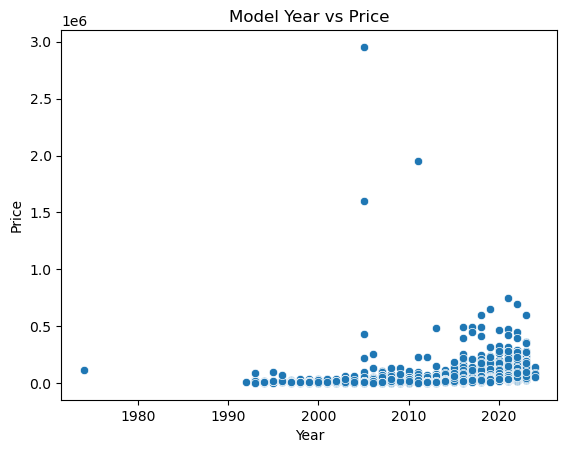

In [29]:
# Scatterplot between model_year and price_usd
sns.scatterplot(x="model_year", y="price_usd", data=data)
plt.title("Model Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

There are few outliers for model_year less than 1980 and price_usd greater than 1500000, we will remove them.

In [30]:
# Getting the outliers from model_year and removing them
outliers = data[(data["model_year"]<1980) | (data["price_usd"]>1500000)].index
data.drop(outliers, inplace=True)
data = data.reset_index(drop=True)

In [31]:
# Brands that have less than 55 cars, we store index in rare_brand variable and rename to "other"
counts = data['brand'].value_counts()
rare_brands = counts[counts<55].index

In [32]:
# Creating dataframe for rare_brands
df_rare_brands = data[data["brand"].isin(rare_brands)]
df_rare_brands.head(10)

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_usd,mileage
11,Aston Martin,DBS Superleggera,2019,Gasoline,715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,184606,22770
13,Lincoln,Aviator Reserve AWD,2022,Gasoline,400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Brown,None reported,Yes,62000,18196
14,Jaguar,F-TYPE,2020,Gasoline,2.0 Liter Supercharged,Automatic,Silver,Black,None reported,NaN,47998,15903
19,Jaguar,F-TYPE R,2018,Gasoline,550.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Black,None reported,Yes,68750,35250
20,Genesis,GV70 3.5T Sport,2023,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Beige,NaN,NaN,60000,5400
40,Bentley,Continental GTC Base,2011,E85 Flex Fuel,552.0HP 6.0L 12 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,None reported,Yes,79950,20200
44,Lucid,Air Grand Touring,2022,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,119999,3552
47,MINI,Convertible John Cooper Works,2017,Gasoline,228.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,29000,24280
52,Hummer,H2 Base,2005,Gasoline,325.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,19500,110900
55,Chrysler,300 Touring,2009,Gasoline,250.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Blue,Black,None reported,Yes,7500,134602


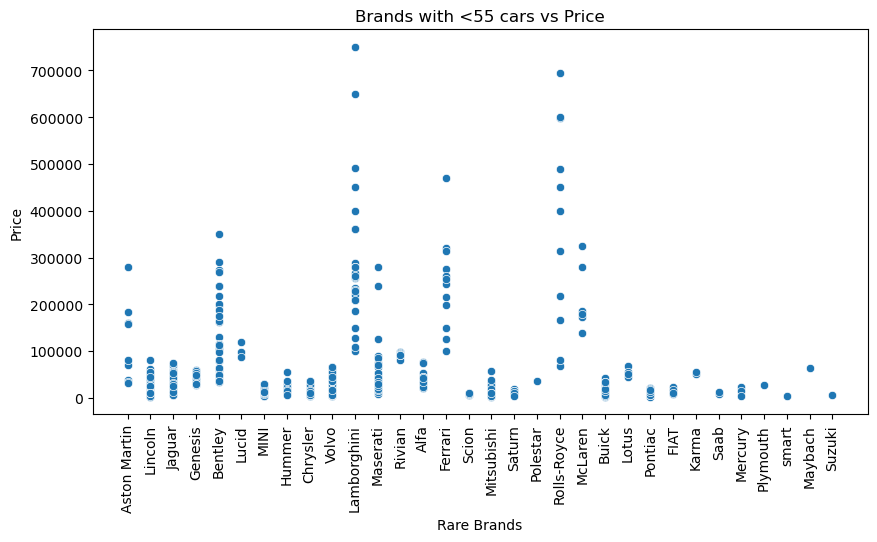

In [33]:
# Plotting rare brands versus price
plt.figure(figsize=(10, 5))
sns.scatterplot(x="brand", y="price_usd", data=df_rare_brands)
plt.xticks(rotation=90)
plt.title("Brands with <55 cars vs Price")
plt.xlabel("Rare Brands")
plt.ylabel("Price")
plt.show()

In [34]:
# Dropping outliers from df_rare_brands
drop_rare_outlier = df_rare_brands[df_rare_brands["price_usd"]>550000].index
data.drop(drop_rare_outlier, inplace=True)
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3998 non-null   object
 1   model         3998 non-null   object
 2   model_year    3998 non-null   int64 
 3   fuel_type     3828 non-null   object
 4   engine        3998 non-null   object
 5   transmission  3998 non-null   object
 6   ext_col       3998 non-null   object
 7   int_col       3998 non-null   object
 8   accident      3885 non-null   object
 9   clean_title   3402 non-null   object
 10  price_usd     3998 non-null   int64 
 11  mileage       3998 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 374.9+ KB


# Feature Engineering

In [35]:
# Importing regular expression library to extract engine volume and engine type from engine column
import re

In [36]:
data.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_usd,mileage
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,51000
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,34742
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,22372
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,88900
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,9835


In [37]:
# Extracing engine volume (3.5L, 2L, etc.) from engine column containing integer with 'L' using regular expression

engine_volume = data["engine"].str.extract(r'(\d+\.?\d*\s*L)', flags=re.IGNORECASE)
engine_volume[0] = engine_volume[0].str.replace("L","").astype(float)
engine_volume.columns = ["engine_volume"]

engine_volume.sample(10)

,engine_volume
3179,3.5
1333,5.3
1156,2.0
1230,NaN
3032,3.8
1949,2.5
3024,NaN
1397,5.0
1336,2.0
2375,3.5


In [38]:
print(f"Total number of NaN values in engine_volume: {engine_volume["engine_volume"].isna().sum()}")

Total number of NaN values in engine_volume: 213


In [39]:
# Getting index of NaN fuel_type and using it to replace engine_volume to 0.0 for Electric cars
electric_fueltype = data[data["fuel_type"].isna()].index
engine_volume.loc[electric_fueltype] = engine_volume.loc[electric_fueltype].fillna(0.0)
engine_volume["engine_volume"].isna().sum()

np.int64(50)

In [40]:
# Getting index of remaining NaN values of engine volumne and checking if it is correctly filled according to fuel type
rem_nan = engine_volume[engine_volume["engine_volume"].isna()].index
data.loc[rem_nan]["fuel_type"].unique()

array(['Gasoline', 'Hybrid', 'Diesel'], dtype=object)

Correlation between price and engine volume: 0.1707903226453748


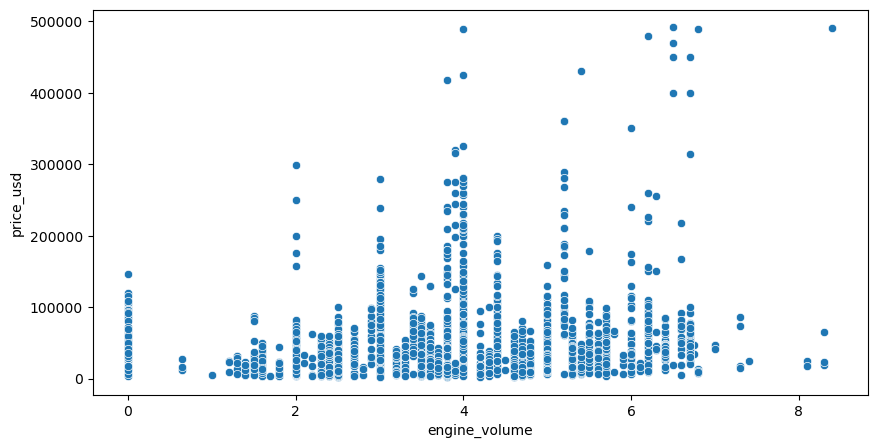

In [41]:
# Scatterplot of engine_volume column
print(f"Correlation between price and engine volume: {data["price_usd"].corr(engine_volume["engine_volume"])}")
plt.figure(figsize=(10,5))
sns.scatterplot(x=engine_volume["engine_volume"], y=data["price_usd"])
plt.show()

Now we are left with engine volume of non electric cars

In [42]:
# Extracting types of engines like V6, V8, I4 etc. using regular expression.
engine_configuration = r'(V\s*(\W)\d+|V\s*\d+|W\s*\d+|\d+(\W)\s*cyl|\d+\s*cyl|I\s*(\W)\d+\s*|I\s*\d+\s*|H\s*(\W)\d+\s*|H\s*\d+\s*|Flat\s*\d+\s*)'
engine_type = data["engine"].str.extract(engine_configuration, flags=re.IGNORECASE)[0].to_frame()
engine_type[0] = engine_type[0].replace({" ": "", "-": ""}, regex=True)
print(f"Unique Engine Types: {engine_type[0].unique()}")

Unique Engine Types: ['V6' nan 'I4' '4Cyl' '8Cyl' '12Cyl' '6Cyl' 'V8' 'Flat6' 'I3' 'V10' '3Cyl'
 'V12' 'H4' 'H6' '5Cyl' '10Cyl' 'I6' 'I5' 'W12']


In [43]:
print(f"Number of NaN values in engine_type: {engine_type[0].isna().sum()}")

Number of NaN values in engine_type: 381


In [44]:
# Replacing engine_type names
engine_configuration_repl = {"I4":"4Cyl", "H4": "4Cyl", "I3":"3Cyl", "I5": "5Cyl", "6Cyl": "I6", "Flat6": "H6", "8Cyl": "V8", "10Cyl": "V10", "W12": "12Cyl", "V12": "12Cyl"}
engine_type[0] = engine_type[0].replace(engine_configuration_repl)
engine_type.columns = ["engine_type"]

engine_type["engine_type"].unique()

array(['V6', nan, '4Cyl', 'V8', '12Cyl', 'I6', 'H6', '3Cyl', 'V10',
       '5Cyl'], dtype=object)

We will fill NaN values of engine_type to Unknown/Electric in model pipeline

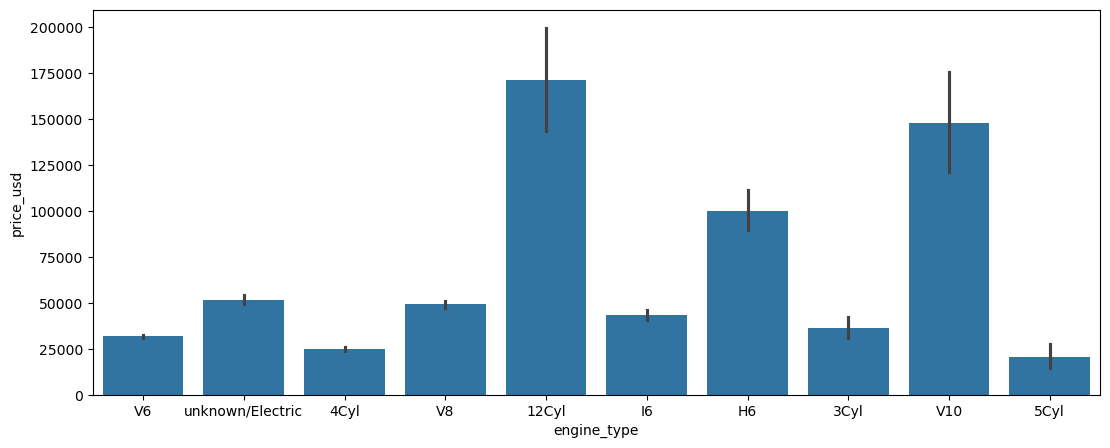

In [45]:
# Filling NaN values temorary for plotting
engine_type_copy = engine_type.copy()
temp_data = data.copy()
engine_type_copy["engine_type"] = engine_type_copy["engine_type"].fillna("unknown/Electric")
temp_data = pd.concat([temp_data, engine_type_copy])

# Barplot of engine_type
plt.figure(figsize=(13,5))
sns.barplot(x="engine_type", y="price_usd", data=temp_data)
plt.show()

In [46]:
# Extracting manual transmission (Manual, mt, m/t, 6-speed) from transmission column using regular expression
manual_gearbox = r'(Manual|Mt|m/t|6.Speed.m\w*)'
transmission_manual = data["transmission"].str.extract(manual_gearbox, flags=re.IGNORECASE)
manual_index = transmission_manual[transmission_manual[0].notna()].index #Getting index of manual transmission

print(f"Number of manual transmission: {transmission_manual.notna().sum().values[0]}")

Number of manual transmission: 375


In [47]:
# Regular expression to capture number of sppeds 6, 7, 8, 9, 10 with speed, spd, a/t, automaic, auto
auto_gearbox = r'([6-9].speed\s*a.\w*|\d{2,}.speed\s*a\w*|\s*auto[\w,\s]*[6-9].\w*|\s*auto[\w,\s]*10.\w*)'
transmission_auto = data["transmission"].str.extract(auto_gearbox, flags=re.IGNORECASE)
transmission_auto[0].unique()

array(['6-Speed A/T', '8-Speed Automatic', nan, '7-Speed A/T',
       '8-Speed A/T', '9-Speed Automatic', '10-Speed A', '9-Speed A/T',
       '7-Speed Automatic', '6-Speed Automatic', '10-Speed Automatic',
       '8-SPEED AT', 'Automatic, 9-Spd', 'Automatic, 8-Spd',
       'Auto, 6-Spd', 'Automatic, 10-Spd', 'Automatic, 7-Spd',
       '6 Speed At', '8-SPEED A/T'], dtype=object)

In [48]:
# Replace irregular string for consistency
def standard_auto_transmission(value):

    if pd.isna(value):
        return value # Keep NaN values as it is
    
    # Convert string to lower case for consistency
    s = str(value).lower()

    # Regular expression to capture number of sppeds 6, 7, 8, 9, 10, folowed by speed, spd, a/t, automaic, a
    match = re.search(r'(\d+)\s*[-]?s*(speed|spd|a/t|automatic|a)?', s)

    if match:

        # Match first group from match variable (d+)
        speed = match.group(1)

        return "{}-speed auto".format(speed)
    
    else:
        pass

# Applying standard_auto_transmission function to new column
transmission_auto["automatic"] = transmission_auto[0].apply(standard_auto_transmission)
transmission_auto["automatic"].unique()

array(['6-speed auto', '8-speed auto', nan, '7-speed auto',
       '9-speed auto', '10-speed auto'], dtype=object)

In [49]:
# Index of 7,8,9,10 speed automatic transmission
speed_6 = transmission_auto[transmission_auto["automatic"]=="6-speed auto"].index
speed_7 = transmission_auto[transmission_auto["automatic"]=="7-speed auto"].index
speed_8 = transmission_auto[transmission_auto["automatic"]=="8-speed auto"].index
speed_9 = transmission_auto[transmission_auto["automatic"]=="9-speed auto"].index
speed_10 = transmission_auto[transmission_auto["automatic"]=="10-speed auto"].index

In [50]:
# Replacing transmission values
data.loc[manual_index, "transmission"] = "6-speed manual"
data.loc[speed_6, "transmission"] = "6-speed auto"
data.loc[speed_7, "transmission"] = "7-speed auto"
data.loc[speed_8, "transmission"] = "8-speed auto"
data.loc[speed_9, "transmission"] = "9-speed auto"
data.loc[speed_10, "transmission"] = "10-speed auto"

# Replacing all other categories to automatic
auto_transmission_index = data[~data["transmission"].isin(["6-speed manual","6-speed auto","7-speed auto", "8-speed auto","9-speed auto","10-speed auto"])].index
data.loc[auto_transmission_index, "transmission"] = "automatic"

print(f"Each category count in {data["transmission"].value_counts()}")
print("")
print(f"NaN values in transmission: {data["transmission"].isna().sum()}")

Each category count in transmission
automatic         2044
8-speed auto       599
6-speed auto       442
6-speed manual     372
7-speed auto       240
10-speed auto      177
9-speed auto       124
Name: count, dtype: int64

NaN values in transmission: 0


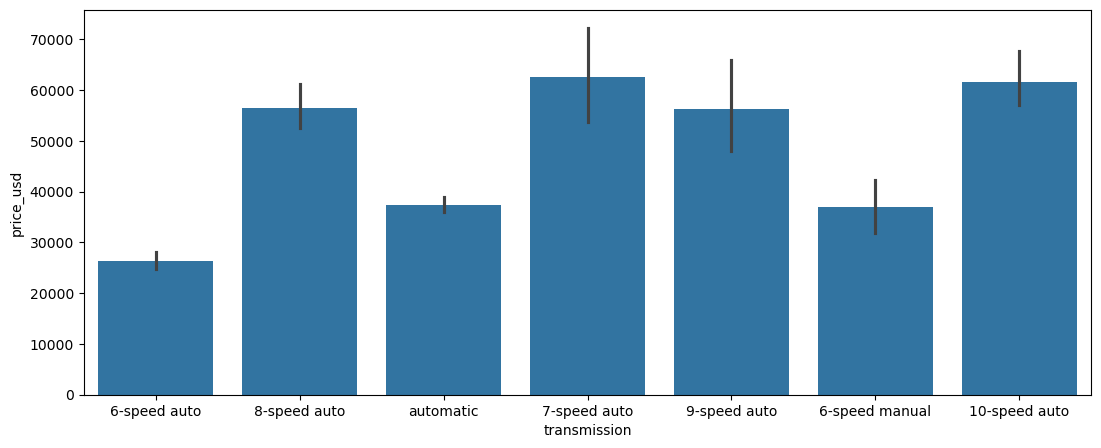

In [51]:
# Transmission barplot
plt.figure(figsize=(13,5))
sns.barplot(x="transmission", y="price_usd", data=data)
plt.show()

In [52]:
# Get common colours from ext_col column

# Common exterior colours
common_ext_col = ["black", "white", "grey", "gray", "silver", "blue", "red"] 
patten_ext_col = "|".join(common_ext_col)
data["ext_col"] = data["ext_col"].str.lower().str.findall(patten_ext_col, flags=re.IGNORECASE).apply(set)
data["ext_col"] = data["ext_col"].str.join("")
data["ext_col"] = data["ext_col"].replace({"": "N/A", "gray": "grey", "grayblack": "N/A", "blackgray": "N/A"}) # N/A - Not available

# Value counts of filtered exterior colours
data["ext_col"].value_counts()

ext_col
black     1015
white      921
grey       543
silver     419
N/A        396
blue       394
red        310
Name: count, dtype: int64

In [53]:
# Concatenating engine_type and engine_volume with data
data = pd.concat([data, engine_type, engine_volume], axis=1)
data.sample(10)

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_usd,mileage,engine_type,engine_volume
3569,Volvo,XC70 3.2,2008,Gasoline,235.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,6-speed auto,white,Beige,None reported,Yes,7000,170000,I6,3.2
270,Honda,CR-V EX,2003,Gasoline,160.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,6-speed manual,black,Gray,None reported,Yes,3900,224000,4Cyl,2.4
1466,Chevrolet,Cruze LTZ,2013,Gasoline,138.0HP 1.4L 4 Cylinder Engine Gasoline Fuel,automatic,blue,Black,At least 1 accident or damage reported,Yes,10000,87000,4Cyl,1.4
2993,Mercedes-Benz,AMG GLE AMG GLE 63 S-Model 4MATIC,2016,Gasoline,577.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,7-speed auto,black,White,None reported,Yes,51700,35943,V8,5.5
438,Chevrolet,Corvette Z06,2007,Gasoline,505.0HP 7.0L 8 Cylinder Engine Gasoline Fuel,6-speed manual,N/A,Black,None reported,Yes,47500,11025,V8,7.0
711,BMW,328 i xDrive,2013,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,automatic,black,Black,At least 1 accident or damage reported,Yes,13500,96000,4Cyl,2.0
2467,Jaguar,E-PACE S,2019,Gasoline,246.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,automatic,black,Black,None reported,Yes,29000,44000,4Cyl,2.0
282,Jeep,Gladiator Rubicon,2022,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,automatic,white,Black,None reported,Yes,54000,8794,V6,3.6
179,Ford,Transit-350 XL,2018,E85 Flex Fuel,275.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,automatic,white,Gray,None reported,Yes,43000,95000,V6,3.7
2456,Nissan,350Z Touring,2008,Gasoline,306.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,automatic,grey,Beige,At least 1 accident or damage reported,Yes,13500,123500,V6,3.5


In [54]:
# Replacing brands with less than 55 cars to "Other"
data["brand"] = data["brand"].replace(rare_brands.to_list(), "Other")
data["brand"].value_counts()

brand
Other            495
Ford             385
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          200
Audi             200
Toyota           197
Lexus            163
Jeep             143
Land Rover       130
Nissan           116
Cadillac         107
RAM               91
GMC               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Subaru            64
Acura             64
Mazda             64
Honda             63
INFINITI          59
Volkswagen        59
Name: count, dtype: int64

In [55]:
model_count = data['model'].value_counts()
rare_model = model_count[model_count<2].index

# Creating dataframe for rare_models
df_rare_model = data[data["model"].isin(rare_model)]
df_rare_model.head(10)

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_usd,mileage,engine_type,engine_volume
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,automatic,blue,Black,None reported,NaN,54598,22372,NaN,3.5
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-speed auto,black,Black,None reported,Yes,15500,88900,V6,3.5
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-speed auto,white,Black,None reported,NaN,34999,9835,4Cyl,2.0
5,Acura,ILX 2.4L,2016,Gasoline,2.4 Liter,automatic,silver,Ebony.,None reported,NaN,14798,136397,NaN,2.4
7,BMW,740 iL,2001,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,automatic,N/A,Green,None reported,Yes,7300,242000,V8,4.4
8,Lexus,RC 350 F Sport,2021,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-speed auto,black,Black,None reported,Yes,41927,23436,V6,3.5
10,Land Rover,Range Rover Sport 3.0 Supercharged HST,2021,Gasoline,V6,automatic,white,Pimento / Ebony,None reported,NaN,73897,27608,V6,NaN
14,Other,F-TYPE,2020,Gasoline,2.0 Liter Supercharged,automatic,silver,Black,None reported,NaN,47998,15903,NaN,2.0
21,Chevrolet,S-10 LS,2000,E85 Flex Fuel,120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capab...,automatic,blue,Black,None reported,Yes,4500,133510,4Cyl,2.2
22,BMW,440 Gran Coupe 440i xDrive,2020,Gasoline,3.0 Liter Turbo,automatic,white,Beige,None reported,NaN,38598,25990,NaN,3.0


In [56]:
# Replacing model column that have less than 2 models to "limited_model"
data["model"] = data["model"].replace(rare_model.to_list(), "limited_model")

In [57]:
# Checking if there are any duplicate rows
data.duplicated().sum()

np.int64(0)

In [58]:
# Selecting columns to export dataset
processed_data = data.drop(columns=[ "engine", "int_col", "clean_title"])
processed_data = processed_data.rename(columns={"accident": "damage", "mileage": "mileage in miles"})
processed_data["damage"] = processed_data["damage"].replace("At least 1 accident or damage reported", "Damage reported")
processed_data.columns

Index(['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'ext_col',
       'damage', 'price_usd', 'mileage in miles', 'engine_type',
       'engine_volume'],
      dtype='object')

In [59]:
# Arranging dataframe
processed_data = processed_data[['brand', 'model', 'model_year', 'engine_volume', 'engine_type', 'transmission', 'fuel_type', 'ext_col', 'mileage in miles', 'damage', 'price_usd']]
processed_data.head(20)

,brand,model,model_year,engine_volume,engine_type,transmission,fuel_type,ext_col,mileage in miles,damage,price_usd
0,Ford,Utility Police Interceptor Base,2013,3.7,V6,6-speed auto,E85 Flex Fuel,black,51000,Damage reported,10300
1,Hyundai,Palisade SEL,2021,3.8,V6,8-speed auto,Gasoline,N/A,34742,Damage reported,38005
2,Lexus,limited_model,2022,3.5,NaN,automatic,Gasoline,blue,22372,None reported,54598
3,INFINITI,limited_model,2015,3.5,V6,7-speed auto,Hybrid,black,88900,None reported,15500
4,Audi,limited_model,2021,2.0,4Cyl,8-speed auto,Gasoline,white,9835,None reported,34999
5,Acura,limited_model,2016,2.4,NaN,automatic,Gasoline,silver,136397,None reported,14798
6,Audi,S3 2.0T Premium Plus,2017,2.0,4Cyl,6-speed auto,Gasoline,blue,84000,None reported,31000
7,BMW,limited_model,2001,4.4,V8,automatic,Gasoline,N/A,242000,None reported,7300
8,Lexus,limited_model,2021,3.5,V6,6-speed auto,Gasoline,black,23436,None reported,41927
9,Tesla,Model X Long Range Plus,2020,0.0,NaN,automatic,NaN,black,34000,None reported,69950


In [60]:
print(f"Shape of preprocessed data: {processed_data.shape}")

Shape of preprocessed data: (3998, 11)


In [61]:
#processed_data.to_csv('used_cars_preprocessed.csv', index = False)